In [ ]:
# Step 1: Import libraries and load dataset
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("loan_approval_dataset.csv")

# Display first few rows
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
# Step 2: Check shape, info, and duplicates
print("Shape of dataset:", df.shape)
print("\nData types and non-null counts:")
print(df.info())

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")

# Remove duplicates if any
df = df.drop_duplicates()
print("Shape after removing duplicates:", df.shape)


Shape of dataset: (4269, 13)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes

In [ ]:
# Step 3: Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Fill missing numeric values with median
num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill missing categorical values with mode
cat_cols = df.select_dtypes(exclude=[np.number]).columns
for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verify again
print("\nMissing values after imputation:")
print(df.isnull().sum())



Missing values per column:
loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

Missing values after imputation:
loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


/tmp/ipython-input-1168621635.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-3201293548.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='loan_status', data=df, palette='Set2')


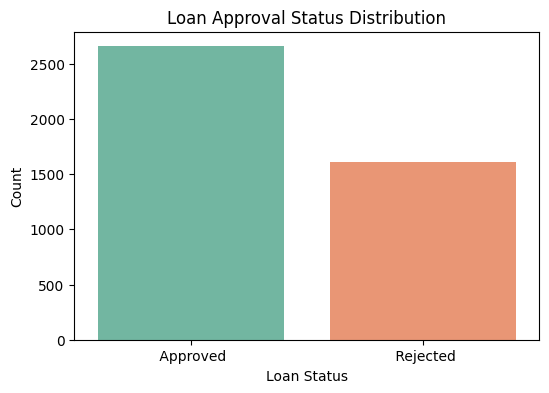

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Clean column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# Plot 1: Loan approval status distribution
plt.figure(figsize=(6,4))
sns.countplot(x='loan_status', data=df, palette='Set2')
plt.title('Loan Approval Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


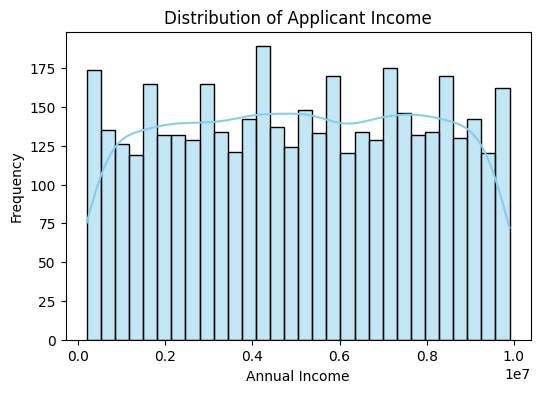

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 2: Applicant income distribution
plt.figure(figsize=(6,4))
sns.histplot(df['income_annum'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Applicant Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()


/tmp/ipython-input-3508105965.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='loan_status', y='loan_amount', data=df, palette='coolwarm')


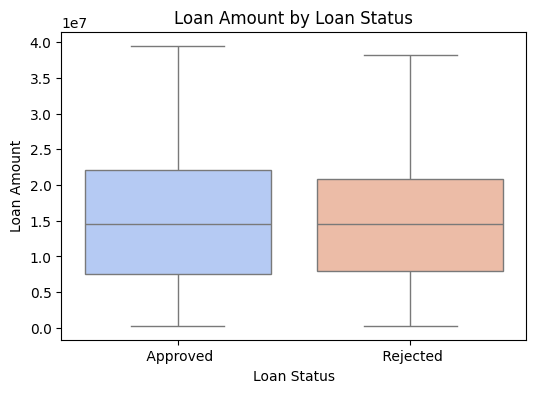

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 3: Loan Amount vs Loan Status
plt.figure(figsize=(6,4))
sns.boxplot(x='loan_status', y='loan_amount', data=df, palette='coolwarm')
plt.title('Loan Amount by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()


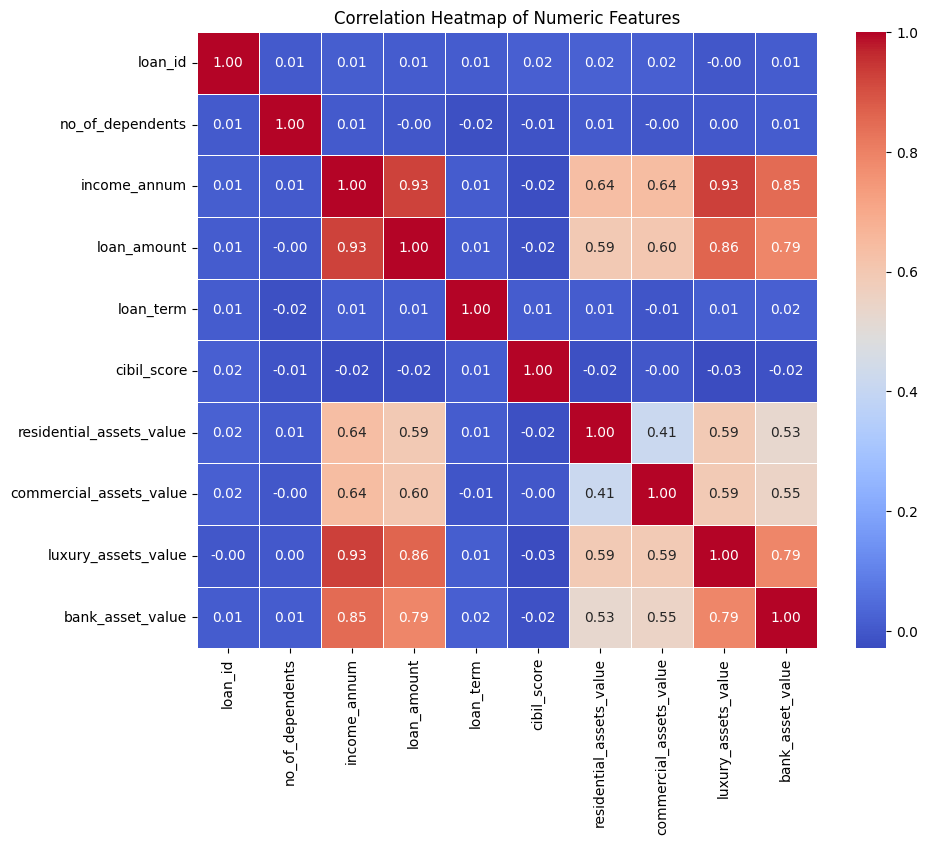

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot 4: Correlation heatmap for numeric features
plt.figure(figsize=(10,8))
corr = df.select_dtypes(include=['number']).corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import pandas as pd


df.columns = df.columns.str.strip()

y = df['loan_status'].astype('string').str.strip().map({'Approved': 1, 'Rejected': 0})
df = df.loc[y.notna()].reset_index(drop=True)
y = y.loc[y.notna()].astype(int).reset_index(drop=True)

X = df.drop(columns=['loan_id', 'loan_status'])
X = pd.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_res)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)
print("y_train_res:", y_train_res.shape)
print("y_test:", y_test.shape)


X_train_scaled: (3984, 11)
X_test_scaled: (1068, 11)
y_train_res: (3984,)
y_test: (1068,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train_res)
y_pred_rf = rf.predict(X_test_scaled)

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


=== Random Forest ===
Accuracy: 0.9840823970037453

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       404
           1       0.99      0.99      0.99       664

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068

Confusion Matrix:
 [[395   9]
 [  8 656]]


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb.fit(X_train_scaled, y_train_res)
y_pred_xgb = xgb.predict(X_test_scaled)

print("=== XGBoost ===")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [15:58:13] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost ===
Accuracy: 0.9840823970037453

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       404
           1       0.99      0.99      0.99       664

    accuracy                           0.98      1068
   macro avg       0.98      0.98      0.98      1068
weighted avg       0.98      0.98      0.98      1068

Confusion Matrix:
 [[395   9]
 [  8 656]]


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

ann = MLPClassifier(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    max_iter=200,
    random_state=42
)
ann.fit(X_train_scaled, y_train_res)
y_pred_ann = ann.predict(X_test_scaled)

print("=== Artificial Neural Network (ANN) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_ann))
print("\nClassification Report:\n", classification_report(y_test, y_pred_ann))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ann))


=== Artificial Neural Network (ANN) ===
Accuracy: 0.9709737827715356

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       404
           1       0.97      0.98      0.98       664

    accuracy                           0.97      1068
   macro avg       0.97      0.97      0.97      1068
weighted avg       0.97      0.97      0.97      1068

Confusion Matrix:
 [[386  18]
 [ 13 651]]


/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


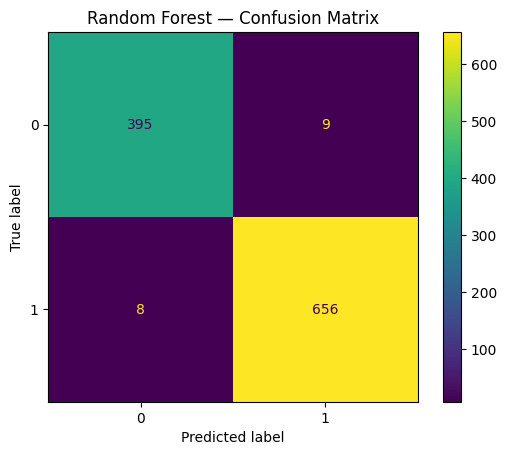

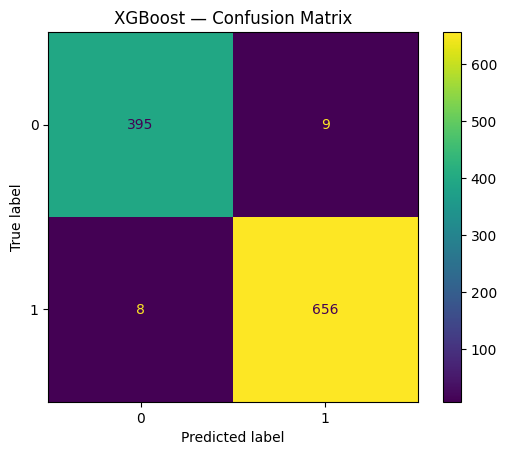

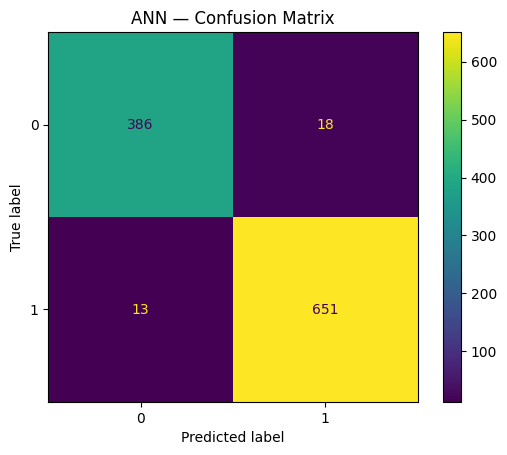

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Random Forest
cm_rf = confusion_matrix(y_test, rf.predict(X_test_scaled))
ConfusionMatrixDisplay(confusion_matrix=cm_rf).plot(values_format="d")
plt.title("Random Forest — Confusion Matrix")
plt.show()

# XGBoost
cm_xgb = confusion_matrix(y_test, xgb.predict(X_test_scaled))
ConfusionMatrixDisplay(confusion_matrix=cm_xgb).plot(values_format="d")
plt.title("XGBoost — Confusion Matrix")
plt.show()

# ANN
cm_ann = confusion_matrix(y_test, ann.predict(X_test_scaled))
ConfusionMatrixDisplay(confusion_matrix=cm_ann).plot(values_format="d")
plt.title("ANN — Confusion Matrix")
plt.show()


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import roc_auc_score, accuracy_score
import numpy as np

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    tree_method="hist",
    random_state=42
)

param_dist_xgb = {
    "n_estimators": np.arange(200, 801, 100),
    "max_depth": np.arange(3, 9),
    "learning_rate": [0.01, 0.03, 0.05, 0.1],
    "subsample": [0.6, 0.7, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.7, 0.8, 1.0],
    "min_child_weight": [1, 3, 5, 7],
    "reg_lambda": [0.5, 1.0, 1.5, 2.0],
    "gamma": [0, 0.1, 0.2]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

search_xgb = RandomizedSearchCV(
    xgb,
    param_distributions=param_dist_xgb,
    n_iter=40,
    scoring="roc_auc",
    cv=cv,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search_xgb.fit(X_train_scaled, y_train_res)
best_xgb = search_xgb.best_estimator_

y_pred = best_xgb.predict(X_test_scaled)
y_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]

print("Best params:", search_xgb.best_params_)
print("Test AUC:", roc_auc_score(y_test, y_proba))
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best params: {'subsample': 0.8, 'reg_lambda': 2.0, 'n_estimators': np.int64(700), 'min_child_weight': 3, 'max_depth': np.int64(6), 'learning_rate': 0.05, 'gamma': 0, 'colsample_bytree': 1.0}
Test AUC: 0.9989487653584636
Test Accuracy: 0.9850187265917603
